___

<center><h1>Clustering Model - Youtube</h1></center>

___

<center><h2>Pragma</h2></center><br>
<center> Assessment Consultor Cientifico de Datos </center>

___
<p></p>
<center style="color: #AA6373; font-weight: 400;"><strong>Presentado por:</strong></center>
<center style="color: #AA6373; font-weight: 400;">Jorge Forero L.</center>

<center>Mayo 2025</center>
<p></p>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Initial Exploration

In [2]:
df = pd.read_csv('../data/cleaned_youtube_data.csv')

In [3]:
print(df.columns.tolist())

['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description', 'category_name', 'publish_date', 'publish_hour', 'publish_day', 'days_until_trending', 'engagement_rate', 'like_ratio', 'positive_engagement_rate', 'weighted_engagement_score', 'is_weekend', 'is_morning', 'is_afternoon', 'is_evening', 'is_night']


In [4]:
numeric_features = [
    'views',
    'weighted_engagement_score',
    'like_ratio',
    'days_until_trending',
    'is_morning',
    'is_afternoon',
    'is_evening',
    'is_night'
]

categorical_features = ['publish_day']

# Extract features
X_numeric = df[numeric_features]
X_categorical = df[categorical_features]

In [5]:
# One-hot encode categorical features
onehot = OneHotEncoder(sparse_output=False)
X_categorical_encoded = onehot.fit_transform(X_categorical)

# Combine numeric and encoded categorical features
X = np.hstack([X_numeric, X_categorical_encoded])

In [6]:
# Feature Normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [7]:
# K-means Clustering

inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_normalized, kmeans.labels_))

Text(0.5, 1.0, 'Elbow Method For Optimal k')

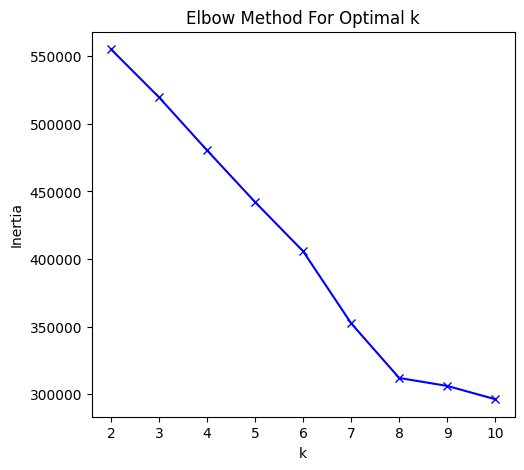

In [8]:
# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

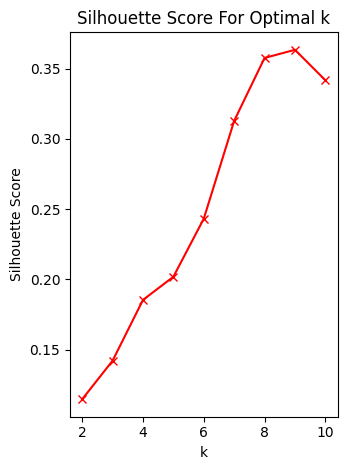

In [9]:
# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.tight_layout()


In [10]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

In [11]:
# Perform K-means with optimal k 
optimal_k = 8  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_normalized)

In [12]:
# Perform DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=8)
dbscan_labels = dbscan.fit_predict(X_normalized)

In [13]:
# Add cluster labels to the original dataframe
df['kmeans_cluster'] = kmeans_labels
df['dbscan_cluster'] = dbscan_labels

In [14]:
# Analyze cluster characteristics
print("\nK-means Clustering Results:")
# For numeric features
print("\nNumeric Features:")
print(df.groupby('kmeans_cluster')[numeric_features].mean())


K-means Clustering Results:

Numeric Features:
                       views  weighted_engagement_score  like_ratio  \
kmeans_cluster                                                        
0               2.953206e+06                   3.991768    0.926835   
1               1.844315e+06                   3.964344    0.922208   
2               1.858813e+06                   4.387345    0.936464   
3               2.727521e+06                   4.229698    0.936030   
4               4.375319e+06                   3.704903    0.941368   
5               1.729033e+06                   4.177353    0.924860   
6               2.008410e+06                   4.328327    0.938677   
7               2.434538e+06                   4.273278    0.936636   

                days_until_trending  is_morning  is_afternoon  is_evening  \
kmeans_cluster                                                              
0                         24.318565    0.109269      0.353901    0.351998   
1         

In [15]:
# For categorical features
print("\nCategorical Features (Publish Day):")
print(df.groupby('kmeans_cluster')['publish_day'].value_counts(normalize=True).unstack(fill_value=0))



Categorical Features (Publish Day):
publish_day       Friday    Monday  Saturday  Sunday  Thursday   Tuesday  \
kmeans_cluster                                                             
0               0.000000  0.000000       0.0     1.0  0.000000  0.000000   
1               0.000000  1.000000       0.0     0.0  0.000000  0.000000   
2               0.000000  0.000000       0.0     0.0  0.000000  0.000000   
3               1.000000  0.000000       0.0     0.0  0.000000  0.000000   
4               0.494603  0.006032       0.0     0.0  0.269206  0.212063   
5               0.000000  0.000000       1.0     0.0  0.000000  0.000000   
6               0.000000  0.000000       0.0     0.0  0.000000  1.000000   
7               0.000000  0.000000       0.0     0.0  1.000000  0.000000   

publish_day     Wednesday  
kmeans_cluster             
0                0.000000  
1                0.000000  
2                1.000000  
3                0.000000  
4                0.018095  
5     

In [16]:
# For numeric features
print("\nNumeric Features:")
print(df.groupby('dbscan_cluster')[numeric_features].mean())

# For categorical features
print("\nCategorical Features (Publish Day):")
print(df.groupby('dbscan_cluster')['publish_day'].value_counts(normalize=True).unstack(fill_value=0))

print("\nDBSCAN Clustering Results:")


Numeric Features:
                       views  weighted_engagement_score  like_ratio  \
dbscan_cluster                                                        
-1              1.595719e+07                   5.361479    0.820674   
 0              1.608027e+06                   5.012399    0.943928   
 1              9.412480e+05                   3.180904    0.926636   
 2              1.943992e+06                   4.445625    0.945215   
 3              1.719945e+06                   2.535020    0.927438   
...                      ...                        ...         ...   
 110            1.425284e+07                   1.962464    0.848921   
 111            8.815831e+06                   0.525716    0.715399   
 112            1.010827e+07                  12.433294    0.996094   
 113            3.942665e+07                   1.665565    0.936528   
 114            3.776166e+07                   2.328831    0.962561   

                days_until_trending  is_morning  is_after

In [17]:
pca_df['kmeans_cluster'] = kmeans_labels
pca_df['dbscan_cluster'] = dbscan_labels

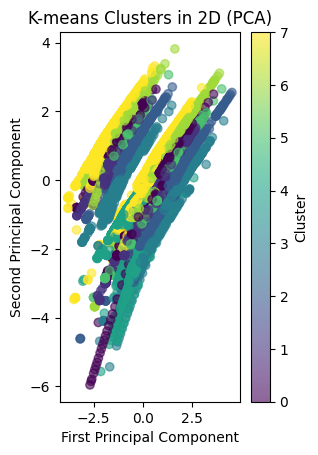

In [18]:
# K-means clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                     c=pca_df['kmeans_cluster'], 
                     cmap='viridis', 
                     alpha=0.6)
plt.title('K-means Clusters in 2D (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Cluster')

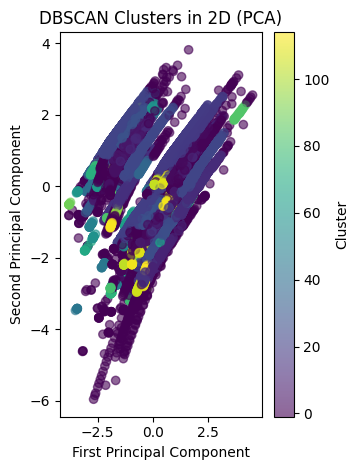

In [19]:
# DBSCAN clusters 
plt.subplot(1, 2, 2)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                     c=pca_df['dbscan_cluster'], 
                     cmap='viridis', 
                     alpha=0.6)
plt.title('DBSCAN Clusters in 2D (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Cluster')

plt.tight_layout()


Text(0.5, 1.0, 'DBSCAN Cluster Distribution')

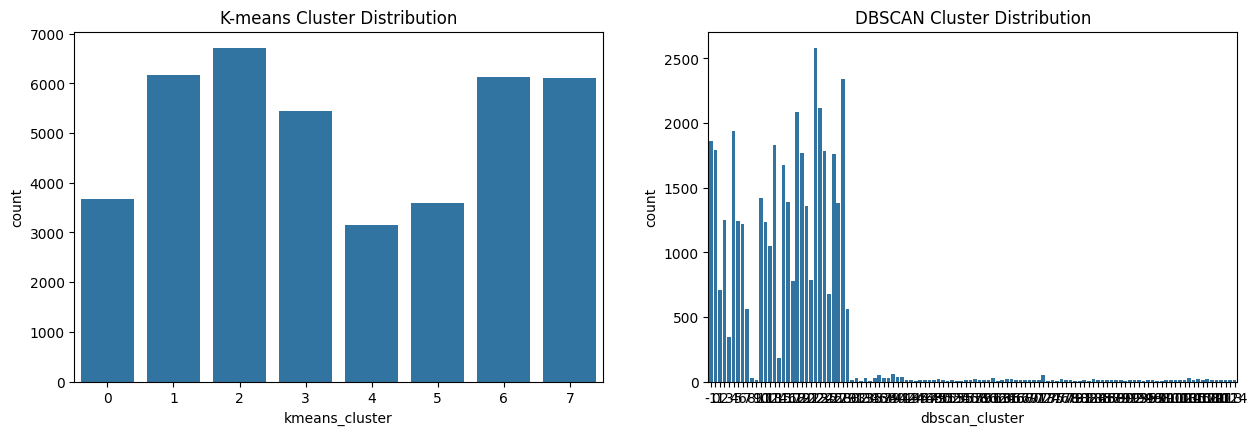

In [20]:
# Create visualizations for cluster distributions
plt.figure(figsize=(15, 10))

# K-means cluster distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='kmeans_cluster')
plt.title('K-means Cluster Distribution')

# DBSCAN cluster distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='dbscan_cluster')
plt.title('DBSCAN Cluster Distribution')